In [ ]:
# Importing the required libraries
import pandas as pd
import numpy as np
import math

# Reading the dataset (Tennis-dataset)
data = pd.read_csv('PlayTennis.csv')
print(data)
testing_data = data[7:]
data = data[:7]

     outlook  temp humidity windy play
0      sunny   hot     high    no   no
1      sunny   hot     high   yes   no
2   overcast   hot     high    no  yes
3      rainy  mild     high    no  yes
4      rainy  cool   normal    no  yes
5      rainy  cool   normal   yes   no
6   overcast  cool   normal   yes  yes
7      sunny  mild     high    no   no
8      sunny  cool   normal    no  yes
9      rainy  mild   normal    no  yes
10     sunny  mild   normal   yes  yes
11  overcast  mild     high   yes  yes
12  overcast   hot   normal    no  yes
13     rainy  mild     high   yes   no


In [ ]:
data.head()


,outlook,temp,humidity,windy,play
0,sunny,hot,high,no,no
1,sunny,hot,high,yes,no
2,overcast,hot,high,no,yes
3,rainy,mild,high,no,yes
4,rainy,cool,normal,no,yes


In [ ]:
data.describe()

,outlook,temp,humidity,windy,play
count,7,7,7,7,7
unique,3,3,2,2,2
top,sunny,mild,normal,no,yes
freq,3,5,4,4,5


In [ ]:
#data.drop(['day'],inplace=True,axis=1)

In [ ]:
data

,outlook,temp,humidity,windy,play
7,sunny,mild,high,no,no
8,sunny,cool,normal,no,yes
9,rainy,mild,normal,no,yes
10,sunny,mild,normal,yes,yes
11,overcast,mild,high,yes,yes
12,overcast,hot,normal,no,yes
13,rainy,mild,high,yes,no


In [ ]:
def find_entropy_dataset(data):
    """
    entropy : - ∑ P(X)logP(X)
    """
    Class = data.keys()[-1]   
    entropy = 0
    values = data[Class].unique()
    for value in values:
        f = data[Class].value_counts()[value]/len(data[Class])
        entropy += -f*np.log(f)
    return entropy

In [ ]:
entropy_dataset = find_entropy_dataset(data)
print(f'Entropy of the entire dataset: {entropy_dataset}') 

Entropy of the entire dataset: 0.5982695885852573


In [ ]:
def entropy_each(data,attribute):
    target_variables = data.play.unique()  #[ 'Yes' , 'No']
    variables = data[attribute].unique()     # sunny, overcast, rainy
    #print(variables)
    max = 0
    min = 0
    entropy_attribute = 0   
  
    entropy_attribute = 0
    for variable in variables: # sunny
        entropy_each_feature = 0
        for target_variable in target_variables: # YEs or No 
            num = len(data[attribute][data[attribute]==variable][data.play ==target_variable]) #numerator : calculating sunny Yes
            den = len(data[attribute][data[attribute]==variable])  #denominator : Sunny
            fraction = num/(den+np.finfo(float).eps)  
            entropy_each_feature += -fraction*np.log(fraction+np.finfo(float).eps) #This calculates entropy for one feature 
        fraction2 = den/len(data)
        entropy_attribute += -fraction2*entropy_each_feature   #Sums up all the entropy 

    return(abs(entropy_attribute))

In [ ]:
attribute_entropy = {k:entropy_each(data,k) for k in data.keys()[:-1]}
attribute_entropy

{'humidity': 0.2727917864120623,
 'outlook': 0.470833838000618,
 'temp': 0.4807226192923258,
 'windy': 0.5941261547656669}

In [ ]:
def information_gain(entropy_dataset,attribute_entropy):
    return(entropy_dataset-attribute_entropy)

In [ ]:
InfoGain = {k:information_gain(entropy_dataset,attribute_entropy[k]) for k in attribute_entropy}
print(InfoGain)

{'outlook': 0.12743575058463924, 'temp': 0.11754696929293146, 'humidity': 0.32547780217319494, 'windy': 0.00414343381959037}


In [ ]:
def find_winner(data):
    Entropy_att = []
    IG = []
    for key in data.keys()[:-1]:
        IG.append(find_entropy_dataset(data)-entropy_each(data,key))
    return data.keys()[:-1][np.argmax(IG)]
  

In [ ]:
def get_subtable(data, node,value):
  return data[data[node] == value].reset_index(drop=True)

In [ ]:
node = find_winner(data)
attValue = np.unique(data[node])
for value in attValue:
  subtable = get_subtable(data,node,value)
  print(subtable)
  print('\n')

    outlook  temp humidity windy play
0     sunny  mild     high    no   no
1  overcast  mild     high   yes  yes
2     rainy  mild     high   yes   no


    outlook  temp humidity windy play
0     sunny  cool   normal    no  yes
1     rainy  mild   normal    no  yes
2     sunny  mild   normal   yes  yes
3  overcast   hot   normal    no  yes




In [ ]:
def buildTree(data,tree=None): 
    Class = data.keys()[-1]  
    

    node = find_winner(data) #outlook
    
  
    attValue = np.unique(data[node]) # ['sunny', 'rainy', 'overcast']
    
    if tree is None:                    
        tree={}
        tree[node] = {}
    

    for value in attValue:
        
        subtable = get_subtable(data,node,value) # prints all records with the value
        clValue,counts = np.unique(subtable[Class],return_counts=True)  # number of no's and number of yes's                      
        
        if len(counts)==1:#Checking purity of subset
            tree[node][value] = clValue[0]                                                    
        else:        
            tree[node][value] = buildTree(subtable) #Calling the function recursively 
                   
    return tree

In [ ]:
finalTree  = buildTree(data)
import pprint
pprint.pprint(finalTree)

{'outlook': {'overcast': 'yes',
             'rainy': {'windy': {'no': 'yes', 'yes': 'no'}},
             'sunny': 'no'}}


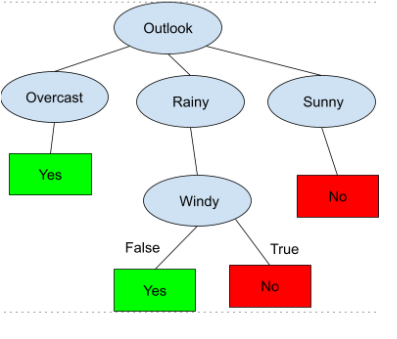

In [ ]:
def check(record, finalTree):
  if type(finalTree) is dict:
    res = 0
    for key in finalTree.keys() :
        f = key
        res= finalTree[key]
    l2 = record[f]
    return check(record, res[l2])
  elif record['play'] == finalTree:
    return 1
  else:
    return 0

In [ ]:
recs = testing_data.to_dict('records')
sum = 0
total = len(recs)

for i in range(len(recs)):
  #print(recs[i])
  sum = sum +check(recs[i], finalTree)

print('Accuracy of this algorithm = ' ,round(sum/total *100 , 2) )

Accuracy of this algorithm =  71.43


In [ ]:
!wget https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv


# Reading the dataset (Tennis-dataset)
titanic_data = pd.read_csv('titanic.csv')
print(titanic_data)
td = pd.DataFrame(titanic_data,columns = ['Sex', 'Pclass', 'Parch','Embarked','Survived'])
td.rename(columns = {'Survived':'play'}, inplace = True)
for i in td.index:
  if td['play'][i] == 1:
    td['play'][i]  = 'yes'
  else:
    td['play'][i]  = 'no'

train_data_titanic = td[30:40]
testing_data_titanic = td[-14:]

--2022-02-18 09:53:05--  https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60302 (59K) [text/plain]
Saving to: ‘titanic.csv.14’

titanic.csv.14      100%[===================>]  58.89K  --.-KB/s    in 0.007s  

2022-02-18 09:53:05 (7.95 MB/s) - ‘titanic.csv.14’ saved [60302/60302]

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
print(train_data_titanic)

       Sex  Pclass  Parch Embarked play
30    male       1      0        C   no
31  female       1      0        C  yes
32  female       3      0        Q  yes
33    male       2      0        S   no
34    male       1      0        C   no
35    male       1      0        S   no
36    male       3      0        C  yes
37    male       3      0        S   no
38  female       3      0        S   no
39  female       3      0        C  yes


In [ ]:
finalTree  = buildTree(train_data_titanic)
import pprint
pprint.pprint(finalTree)

{'Embarked': {'C': {'Sex': {'female': 'yes',
                            'male': {'Pclass': {1: 'no', 3: 'yes'}}}},
              'Q': 'yes',
              'S': 'no'}}


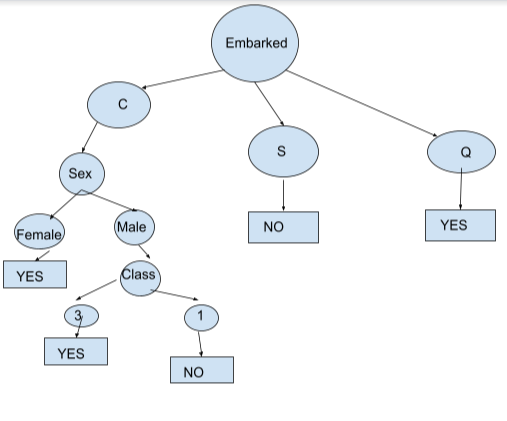

In [ ]:
recs = testing_data_titanic.to_dict('records')
sum = 0
total = len(recs)

for i in range(len(recs)):
  #print(recs[i])
  sum = sum +check(recs[i], finalTree)

print('Accuracy of this algorithm = ' ,round(sum/total *100 , 2) )

Accuracy of this algorithm =  64.29


Decision trees assist analysts in evaluating upcoming choices. The tree
creates a visual representation of all possible outcomes, rewards and
follow-up decisions in one document.
Each subsequent decision resulting from the original choice is also depicted
on the tree, so you can see the overall effect of any one decision. As one
goes through the tree and makes choices, one will see a specific path from
one node to another and the impact a decision made now could have down
the road.
Thus in this experiment I was understood what a decision tree is and was
able to implement it as well.